In [1]:
import geopandas as gpd
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import math
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import font_manager, rc

font_path = r'C:/Users/user/NanumFontSetup_TTF_ALL/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_path, size=18).get_name()
rc('font',family=font_name)

In [124]:
pd_acc_data = pd.read_csv('./data/보행자사고/accident_17_19.csv')
pd_acc_data.head()

시군구      도로명  사망자수  중상자수  경상자수  부상신고자수               사고유형  \
0  서울특별시 강남구 역삼동  테헤란로14길     0     0     1       0          차대사람 - 기타   
1  서울특별시 강남구 역삼동   논현로79길     0     0     1       0          차대사람 - 기타   
2  서울특별시 강남구 역삼동   테헤란로4길     0     1     0       0       차대사람 - 차도통행중   
3  서울특별시 강남구 역삼동   테헤란로4길     0     0     1       0  차대사람 - 길가장자리구역통행중   
4  서울특별시 강남구 역삼동   도곡로43길     0     1     0       0         차대사람 - 횡단중   

             도로형태 피해운전자 연령           X          Y  
0     교차로 - 교차로부근      32세  127.033874  37.497249  
1        단일로 - 기타      28세  127.035427  37.496983  
2        단일로 - 기타      46세  127.030333  37.496472  
3        단일로 - 기타      22세  127.030333  37.496472  
4  교차로 - 교차로횡단보도내      45세  127.047667  37.495784

In [125]:
pd_acc_data['피해운전자 연령'].unique()

array(['32세', '28세', '46세', '22세', '45세', '42세', '56세', '40세', '25세',
       '7세', '31세', '29세', '83세', '35세', '24세', '23세', '73세', '41세',
       '26세', '34세', '21세', '27세', '58세', '50세', '68세', '48세', '53세',
       '61세', '20세', '47세', '57세', '33세', '30세', '38세', '81세', '8세',
       '64세', '16세', '37세', '43세', '14세', '36세', '19세', '69세', '76세',
       '67세', '39세', '11세', '15세', '72세', '59세', '55세', '52세', '17세',
       '65세', '9세', '49세', '75세', '44세', '70세', '1세', '54세', '66세', '51세',
       '18세', '74세', '63세', '77세', '2세', '12세', '10세', '80세', '13세',
       '87세', '5세', '60세', '62세', '71세', '79세', '3세', '82세', '90세 이상',
       '4세', '6세', '88세', '84세', '86세', '85세', '78세', '89세', '미분류'],
      dtype=object)

아동 : 13세 이하<br>
노인 : 65세 이상<br>
필터링해서 객체에 저장해보자.<br>
일단 '세'라는 단어를 없애자. 이후 int type으로 변경

In [133]:
for idx, age in pd_acc_data.iterrows():
    if '세 이상' in age['피해운전자 연령']:
        pd_acc_data.loc[idx]['피해운전자 연령'] = age.replace('세 이상','')
    elif '세' in age:
        pd_acc_data.loc[idx]['피해운전자 연령'] = age.replace('세','')

pd_acc_data['피해운전자 연령'].unique()

array(['32세', '28세', '46세', '22세', '45세', '42세', '56세', '40세', '25세',
       '7세', '31세', '29세', '83세', '35세', '24세', '23세', '73세', '41세',
       '26세', '34세', '21세', '27세', '58세', '50세', '68세', '48세', '53세',
       '61세', '20세', '47세', '57세', '33세', '30세', '38세', '81세', '8세',
       '64세', '16세', '37세', '43세', '14세', '36세', '19세', '69세', '76세',
       '67세', '39세', '11세', '15세', '72세', '59세', '55세', '52세', '17세',
       '65세', '9세', '49세', '75세', '44세', '70세', '1세', '54세', '66세', '51세',
       '18세', '74세', '63세', '77세', '2세', '12세', '10세', '80세', '13세',
       '87세', '5세', '60세', '62세', '71세', '79세', '3세', '82세', '90세 이상',
       '4세', '6세', '88세', '84세', '86세', '85세', '78세', '89세', '미분류'],
      dtype=object)

In [135]:
len(pd_acc_data)

7297

In [134]:
len(pd_acc_data[pd_acc_data['피해운전자 연령']=='미분류'])

3

In [52]:
pd_acc_data = pd_acc_data[pd_acc_data['피해운전자 연령']!='미분류']
pd_acc_data.head()

시군구      도로명  사망자수  중상자수  경상자수  부상신고자수               사고유형  \
0  서울특별시 강남구 역삼동  테헤란로14길     0     0     1       0          차대사람 - 기타   
1  서울특별시 강남구 역삼동   논현로79길     0     0     1       0          차대사람 - 기타   
2  서울특별시 강남구 역삼동   테헤란로4길     0     1     0       0       차대사람 - 차도통행중   
3  서울특별시 강남구 역삼동   테헤란로4길     0     0     1       0  차대사람 - 길가장자리구역통행중   
4  서울특별시 강남구 역삼동   도곡로43길     0     1     0       0         차대사람 - 횡단중   

             도로형태 피해운전자 연령           X          Y  
0     교차로 - 교차로부근       32  127.033874  37.497249  
1        단일로 - 기타       28  127.035427  37.496983  
2        단일로 - 기타       46  127.030333  37.496472  
3        단일로 - 기타       22  127.030333  37.496472  
4  교차로 - 교차로횡단보도내       45  127.047667  37.495784

In [98]:
pd_acc_data[['사망자수','중상자수','경상자수','부상신고자수']]

사망자수  중상자수  경상자수  부상신고자수
0        0     0     1       0
1        0     0     1       0
2        0     1     0       0
3        0     0     1       0
4        0     1     0       0
...    ...   ...   ...     ...
7292     0     1     1       0
7293     0     0     1       0
7294     0     1     0       0
7295     0     0     1       0
7296     0     0     1       0

[7294 rows x 4 columns]

In [109]:
pd_acc_data['총사고자수'] = pd_acc_data[['사망자수','중상자수','경상자수','부상신고자수']].sum(axis=1)

In [117]:
pd_acc_data['총사고자수'].unique()

array([1, 2, 3, 4], dtype=int64)

In [112]:
pd_acc_data.drop(columns={'총사고수','총사망자수'},inplace=True)

In [113]:
pd_acc_data.head()

시군구      도로명  사망자수  중상자수  경상자수  부상신고자수               사고유형  \
0  서울특별시 강남구 역삼동  테헤란로14길     0     0     1       0          차대사람 - 기타   
1  서울특별시 강남구 역삼동   논현로79길     0     0     1       0          차대사람 - 기타   
2  서울특별시 강남구 역삼동   테헤란로4길     0     1     0       0       차대사람 - 차도통행중   
3  서울특별시 강남구 역삼동   테헤란로4길     0     0     1       0  차대사람 - 길가장자리구역통행중   
4  서울특별시 강남구 역삼동   도곡로43길     0     1     0       0         차대사람 - 횡단중   

             도로형태  피해운전자 연령           X          Y  총사고자수  
0     교차로 - 교차로부근        32  127.033874  37.497249      1  
1        단일로 - 기타        28  127.035427  37.496983      1  
2        단일로 - 기타        46  127.030333  37.496472      1  
3        단일로 - 기타        22  127.030333  37.496472      1  
4  교차로 - 교차로횡단보도내        45  127.047667  37.495784      1

In [80]:
pd_acc_data[['사망자수','중상자수','경상자수','부상신고자수']].agg(['min','max'])

사망자수  중상자수  경상자수  부상신고자수
min     0     0     0       0
max     1     4     3       3

In [81]:
display(pd_acc_data['사망자수'].unique())
display(pd_acc_data['중상자수'].unique())
display(pd_acc_data['경상자수'].unique())
display(pd_acc_data['부상신고자수'].unique())

array([0, 1], dtype=int64)

array([0, 1, 2, 3, 4], dtype=int64)

array([1, 0, 2, 3], dtype=int64)

array([0, 1, 2, 3], dtype=int64)

In [122]:
display(pd_acc_data.groupby('사망자수').size())
display(pd_acc_data.groupby('중상자수').size())
display(pd_acc_data.groupby('경상자수').size())
display(pd_acc_data.groupby('부상신고자수').size())

사망자수
0    7243
1      54
dtype: int64

중상자수
0    4725
1    2519
2      48
3       4
4       1
dtype: int64

경상자수
0    3044
1    4121
2     124
3       8
dtype: int64

부상신고자수
0    6744
1     542
2      10
3       1
dtype: int64

In [123]:
pd_acc_data['피해운전자 연령'] = pd_acc_data['피해운전자 연령'].astype(int)
pd_acc_data.info()

ValueError: invalid literal for int() with base 10: '32세'

In [115]:
pd_acc_data_child = pd_acc_data[pd_acc_data['피해운전자 연령'] <= 13]
pd_acc_data_older = pd_acc_data[pd_acc_data['피해운전자 연령'] >= 65]
display(len(pd_acc_data_child))
display(len(pd_acc_data_older))
display(len(pd_acc_data_older)+len(pd_acc_data_child))
print(2132/len(pd_acc_data)*100)

576

1556

2132

29.22950370167261


In [116]:
pd_acc_data['피해운전자 연령'].agg(['min','max','mean','std'])

min      1.000000
max     90.000000
mean    45.092542
std     21.396816
Name: 피해운전자 연령, dtype: float64

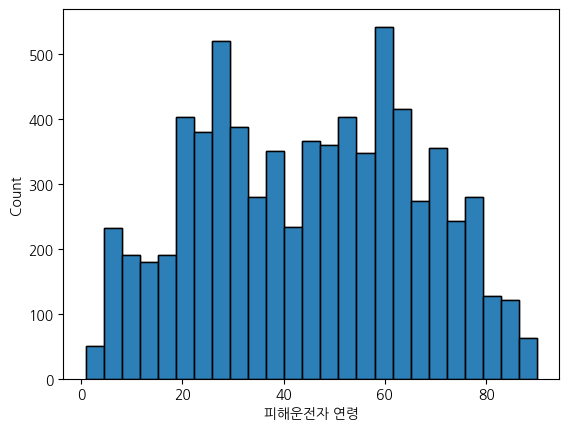

In [60]:
sns.histplot(data=pd_acc_data,x='피해운전자 연령')
plt.show()

In [71]:
# 어린이 버블맵

sns.set_palette("pastel")

# Create a base map
m_4 = folium.Map(location=[37.5665,126.9780], tiles='cartodbpositron', zoom_start=13)

# def color_producer(val):
#     if val <= 13:
#         return 'red'
#     elif val >= 65:
#         return 'blue'
#     else:
#         return 'black'

# Add a bubble map to the base map
for i in range(0,len(pd_acc_data_child)):
    Circle(
        location=[pd_acc_data_child.iloc[i]['Y'], pd_acc_data_child.iloc[i]['X']],
        radius=5, color='red',
        tooltip=str(pd_acc_data_child.iloc[i]['피해운전자 연령'])+'세').add_to(m_4)

# Display the map
m_4

In [74]:
# 노인 버블맵

sns.set_palette("pastel")

# Create a base map
m_4 = folium.Map(location=[37.5665,126.9780], tiles='cartodbpositron', zoom_start=13)

# def color_producer(val):
#     if val <= 13:
#         return 'red'
#     elif val >= 65:
#         return 'blue'
#     else:
#         return 'black'

# Add a bubble map to the base map
for i in range(0,len(pd_acc_data_older)):
    Circle(
        location=[pd_acc_data_older.iloc[i]['Y'], pd_acc_data_older.iloc[i]['X']],
        radius=5,
        color='blue',
        tooltip=str(pd_acc_data_older.iloc[i]['피해운전자 연령'])+'세').add_to(m_4)

# Display the map
m_4

In [120]:
# 어린이 히트맵

m_5 = folium.Map(location=[37.5665,126.9780], tiles='cartodbpositron', zoom_start=13)

mc = MarkerCluster()
for idx, row in pd_acc_data.iterrows():
    if not math.isnan(row['X']) and not math.isnan(row['Y']):
        mc.add_child(Marker([row['Y'], row['X']],tooltip=row['피해운전자 연령']))
m_5.add_child(mc)

# r,g,b,lime
# gradient = {100000:'lime',200000:'skyblue',300000:'red',400000:'green',500000:'blue'}
# Add a heatmap to the base map
HeatMap(data=pd_acc_data_child[['Y', 'X']], radius=5).add_to(m_5)

# Display the map
m_5